## 1) Configuración del ambiente


In [21]:
# Este comando muestra la versión de Python instalada
!python --version
print('------')
# Utiliza el comando pip show para mostrar información sobre la biblioteca Pandas
# (si está instalada) y luego filtra la salida utilizando findstr para mostrar solo
# las líneas que contienen "Name" o "Version". Esto proporcionará el nombre y la versión de la biblioteca Pandas.
!pip show Pandas | findstr "Name Version"
print('------')
# Este comando muestra la versión de Numpy instalada
!pip show Numpy | findstr "Name Version"
print('------')
# Este comando muestra la versión de Matplotlib instalada
!pip show Matplotlib | findstr "Name Version"


Python 3.10.9
------
Name: pandas
Version: 1.5.3
------
Name: numpy
Version: 1.23.5
------
Name: matplotlib
Version: 3.7.0


## 2) Obtención de datos



In [22]:
# Importar las bibliotecas necesarias
# Biblioteca para trabajar con fechas y horas
import datetime
# Biblioteca para obtener datos financieros
import yfinance as yf
# Biblioteca para manipulación de datos en forma de DataFrames
import pandas as pd
# Biblioteca para manipulación de datos en forma de DataFrames
import matplotlib.pyplot as plt

# Definir una función llamada import_base_bitcoin
def importar_base_bitcoin():

  # Declarar variables globales que se usarán para almacenar datos
  global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision

  # Definir el símbolo del Bitcoin en dólares
  symbol = "BTC-USD"

  # Obtener la fecha y hora actual
  end_date = datetime.datetime.now()
  print("Hora UTC:",end_date)

  # Calcular la fecha de inicio, que es 7 días antes que la fecha actual
  start_date = end_date - datetime.timedelta(days=7)

  # Obtener el histórico de precios del Bitcoin en intervalos de 5 minutos
  df_bitcoin = yf.download(symbol, start=start_date, end=end_date, interval="5m")

# Llamar a la función para obtener los datos del Bitcoin
importar_base_bitcoin()

# Mostrar las primeras filas del DataFrame df_bitcoin para verificar los datos
df_bitcoin.head(3)


Hora UTC: 2023-11-04 06:51:41.677978
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-10-28 06:50:00+00:00,34079.980469,34079.980469,34070.925781,34077.246094,34077.246094,0
2023-10-28 06:55:00+00:00,34080.039062,34082.042969,34076.867188,34076.867188,34076.867188,0
2023-10-28 07:00:00+00:00,34063.496094,34076.671875,34063.496094,34076.671875,34076.671875,0


## 3) Extraer tendencias


In [23]:
# Importar BeautifulSoup para el análisis de HTML
from bs4 import BeautifulSoup
# Importar requests para hacer solicitudes HTTP a la web
import requests

# Definir una función llamada extraer_tendencias
def extraer_tendencias():

  # Declarar variables globales que se usarán para almacenar datos
  global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision

  # Configurar un encabezado (user agent) para la solicitud web
  headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/114.0'}

  # URL de la página web a la que se realizará la solicitud
  url = "https://coinmarketcap.com/"

  # Realizar una solicitud GET a la URL con el encabezado definido
  respuesta = requests.get(url, headers=headers)

  # Crear un objeto BeautifulSoup para analizar el contenido HTML de la respuesta
  s = BeautifulSoup(respuesta.content, features="lxml")

  # Buscar todos los elementos HTML con la clase "sc-4984dd93-0 iqdbQL coin-item-symbol"
  respuesta = s.findAll('p',{'class':'sc-4984dd93-0 iqdbQL coin-item-symbol'})

  # Encontrar el índice del símbolo "BTC" en la lista
  indice = 0
  for item in respuesta:
    if item.getText() == 'BTC':
      break
    indice += 1

  # Buscar elementos HTML que contienen información sobre los precios actuales
  respuesta = s.findAll('div', {'class':['sc-a0353bbc-0','cs-a0353bbc-0','gDrtaY fall','sc-a03553bbc-0 rise']})

  # Extraer el precio actual de Bitcoin y convertirlo a un número de punto flotante
  precio_actual = float(respuesta[indice].getText().replace('$','').replace(',',''))

  # Inicializar una lista para almacenar información sobre la tendencia
  lista = []

  # Buscar elementos HTML con información sobre la tendencia
  respuesta = s.findAll('span', {'class': ['sc-d55c02b-0 iwhBxy', 'sc-d55c02b-0 gUnzUB']})

  # Iterar a través de los elementos encontrados, tomando cada tercer elemento
  for item in respuesta[::3]:
    lista.append(item)

  # Inicializar la variable de tendencia como una cadena vacía
  tendencia = ''

  # Comprobar si la clase del elemento indica una tendencia a la baja
  if lista[indice].find('span')['class'][0] == 'icon-Caret-down':
      tendencia = 'baja'
  elif lista[indice].find('span')['class'][0] == 'icon-Caret-up':
      tendencia ='alta'
  else:
      tendencia = 'Mantener'
  
  # Imprimir resultado de la tendencia    
  print("La tendencia es:", tendencia)
  
# Llamar a la función para extraer tendencias
extraer_tendencias()



La tendencia es: alta


## 4) Limpieza de datos


                                   Open          High           Low  \
Datetime                                                              
2023-10-28 06:50:00+00:00  34079.980469  34079.980469  34070.925781   
2023-10-28 06:55:00+00:00  34080.039062  34082.042969  34076.867188   
2023-10-28 07:00:00+00:00  34063.496094  34076.671875  34063.496094   

                                  Close     Adj Close  Volume  
Datetime                                                       
2023-10-28 06:50:00+00:00  34077.246094  34077.246094       0  
2023-10-28 06:55:00+00:00  34076.867188  34076.867188       0  
2023-10-28 07:00:00+00:00  34076.671875  34076.671875       0  
--------------------------
Antes de tratar el dataframe:  (1905, 6)
No hay índices duplicados
Después de tratar la columna índice: (1905, 6)
--------------------------
Hay registros con valor mayor que 0
Despues de tratar la columna Volume: (963, 6)
--------------------------
No hay precios de cierre nulos
Despues de trata

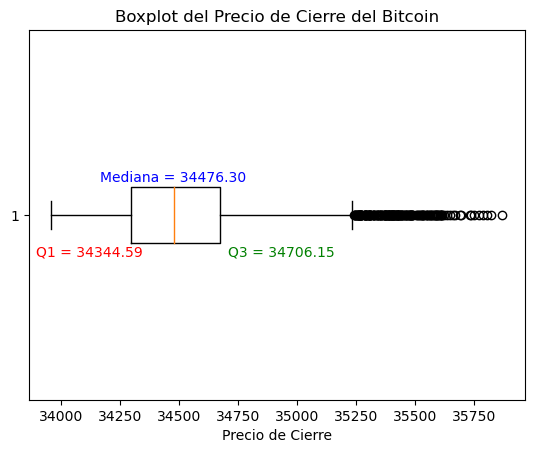

--------------------------
La media del precio de cierre es:  34533.85
filas con nulos:
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
--------------------------


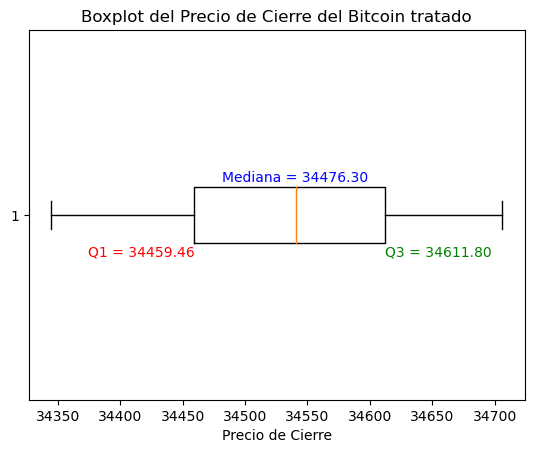

In [27]:
def limpieza_datos():
    # Declarar variables globales que se usarán para almacenar datos
  global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision, df_bitcoin_limpio

  #Crear una copia del dataframe
  df_bitcoin_limpio=df_bitcoin.copy()

  # Visualizar los primeros registros
  print(df_bitcoin_limpio.head(3))

  print("--------------------------")

  # Comprobar tamaño de filas y columnas antes del tratamiento
  print("Antes de tratar el dataframe: ",df_bitcoin_limpio.shape)

  # Comprobar si hay duplicados en la columna indice y tratarlos
  if df_bitcoin_limpio.index.duplicated().any():
    print("Si hay índices duplicados")
    df_bitcoin_limpio.drop_duplicates.shape(inplace = True)
  else:
    print("No hay índices duplicados")

  # Comprobar tamaño de filas y columnas después del tratamiento
  print("Después de tratar la columna índice:",df_bitcoin_limpio.shape)

  print("--------------------------")

  #Comprobar si el volumen es mayor que 0
  # Eliminamos las filas por ser irrelevante en el resultado final. "Si no hay volumen, no hay transaccion"
  if df_bitcoin_limpio.Volume.count()>0:
      print("Hay registros con valor mayor que 0")

      # Crear un filtro para identificar los registros con valor 0 en la columna "Volume"
      filtro = df_bitcoin_limpio['Volume'] == 0

      # Eliminar los registros que cumplen con el filtro
      df_bitcoin_limpio = df_bitcoin_limpio[~filtro]

  else:
      print("No hay registros con valor 0 ")

  # Comprobar tamaño de filas y columnas después del tratamiento
  print("Despues de tratar la columna Volume:",df_bitcoin_limpio.shape)

  print("--------------------------")

  #Comprobar si hay nulos en la columna Close y tratarlos
  if df_bitcoin_limpio.Close.isnull().any():
    print("Si hay precios de cierre con valores nulos")
    # Eliminar solo las filas que tengan valor nulo de la columna 'Close'
    df_bitcoin_limpio.dropna(subset=['Close'], inplace=True)
  else:
    print("No hay precios de cierre nulos")

  # Comprobar tamaño de filas y columnas después del tratamiento
  print("Despues de tratar la columna Close:",df_bitcoin_limpio.shape)

  print("--------------------------")

  # Calcular la mediana
  mediana = df_bitcoin['Close'].median()

  # Calcular los cuartiles Q1 y Q3
  Q1 = df_bitcoin_limpio['Close'].quantile(0.25)
  Q3 = df_bitcoin_limpio['Close'].quantile(0.75)

  # Crear un boxplot para visualizar los outliers en la columna 'Close'
  plt.boxplot(df_bitcoin['Close'], vert=False, showfliers=True)
  plt.xlabel('Precio de Cierre')
  plt.title('Boxplot del Precio de Cierre del Bitcoin')
  # Agregar los cuartiles Q1 y Q3 al gráfico
  plt.text(Q1, 0.90, f'Q1 = {Q1:.2f}', va='center', ha='right', color='red')
  plt.text(Q3, 0.90, f'Q3 = {Q3:.2f}', va='center', ha='left', color='green')
  # Agregar la mediana al gráfico
  plt.text(mediana, 1.1, f'Mediana = {mediana:.2f}', va='center', ha='center', color='blue')
  plt.show()

  print("--------------------------")

  # Filtrar los registros cuyo precio esté entre Q1 y Q3
  df_filtrado = df_bitcoin_limpio[(df_bitcoin_limpio['Close'] >= Q1) & (df_bitcoin_limpio['Close'] <= Q3)]

  # Calcular el promedio de los precios de cierre (Close) del DataFrame df_bitcoin
  media_bitcoin = df_filtrado['Close'].mean()
  print("La media del precio de cierre es: ",round(media_bitcoin,2))

  # Verificar filas con valores nulos en el DataFrame
  filas_con_nulos = df_bitcoin_limpio[df_bitcoin_limpio.isna().any(axis=1)]
  print("filas con nulos:\n",filas_con_nulos.count())

  print("--------------------------")

  # Calcular la mediana filtrada
  mediana_filtrada = df_filtrado['Close'].median()

  # Calcular los cuartiles Q1 y Q3 con el dataframe filtrado
  Q1f = df_filtrado['Close'].quantile(0.25)
  Q3f = df_filtrado['Close'].quantile(0.75)

  # Crear un boxplot para visualizar el filtrado
  plt.boxplot(df_filtrado['Close'], vert=False, showfliers=True)
  plt.xlabel('Precio de Cierre')
  plt.title('Boxplot del Precio de Cierre del Bitcoin tratado')
  # Agregar los cuartiles Q1 y Q3 al gráfico
  plt.text(Q1f, 0.90, f'Q1 = {Q1f:.2f}', va='center', ha='right', color='red')
  plt.text(Q3f, 0.90, f'Q3 = {Q3f:.2f}', va='center', ha='left', color='green')
  # Agregar la mediana al gráfico
  plt.text(mediana_filtrada, 1.1, f'Mediana = {mediana:.2f}', va='center', ha='center', color='blue')
  plt.show()


#Llamar a la función
limpieza_datos()

## 5) Tomar decisiones


In [28]:
def tomar_decisiones():
    # Declarar variables globales que se usarán para almacenar datos
    global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision, df_bitcoin_limpio

    # Calcular el precio promedio
    media_bitcoin = df_bitcoin_limpio['Close'].mean()

    # Determinar la tendencia
    if precio_actual >= media_bitcoin and tendencia == "baja":
        algoritmo_decision = "Vender"
    elif precio_actual <= media_bitcoin and tendencia == "alta":
        algoritmo_decision = "Comprar"
    else:
        algoritmo_decision = "Mantener"

    print(f"El precio actual es {precio_actual:.2f} USD")
    print(f"Tendencia: {tendencia}")
    print(f"Media del precio de Bitcoin: {media_bitcoin:.2f} USD")
    print(f"Algoritmo de decisión: {algoritmo_decision}")

# Llama a la función para calcular la decisión
tomar_decisiones()


El precio actual es 34699.46 USD
Tendencia: alta
Media del precio de Bitcoin: 34630.34 USD
Algoritmo de decisión: Mantener


## 6) Visualización


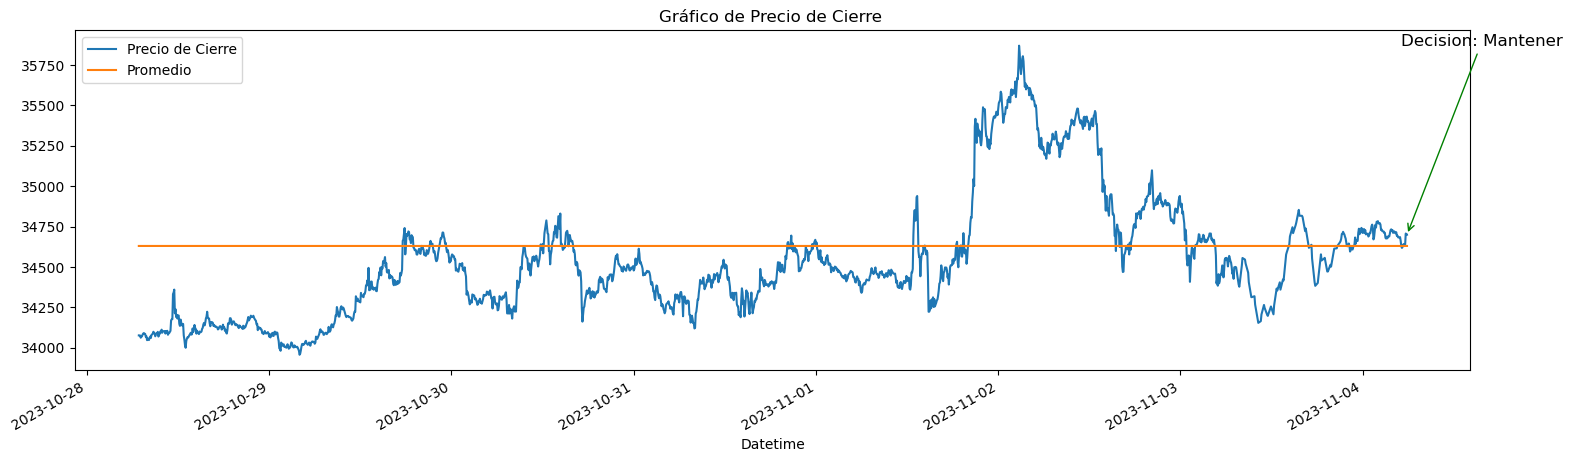

In [29]:
def visualizacion():

  # Declarar variables globales que se usarán para almacenar datos
  global df_bitcoin, precio_actual, tendencia, media_bitcoin, algoritmo_decision, df_bitcoin_limpio

  # Agregar una nueva columna 'Promedio' con el valor de media_bitcoin
  df_bitcoin['Promedio'] = round(media_bitcoin,2)

  # Configurar el tamaño del gráfico
  plt.figure(figsize=(18, 5))

  # Agregar un título al gráfico
  plt.title('Gráfico de Precio de Cierre ')

  # Dibujar una línea con los datos del índice y la columna 'Close'
  df_bitcoin['Close'].plot(label='Precio de Cierre')

  # Dibujar una línea con los datos del índice y la columna 'Promedio'
  df_bitcoin['Promedio'].plot(label='Promedio')

  # Agregar un mensaje al gráfico con la decisión
  plt.annotate(f'Decision: {algoritmo_decision}', xy=(df_bitcoin.index[-1], df_bitcoin['Close'].iloc[-1]),
  xytext=(df_bitcoin.index[-10], df_bitcoin['Close'].max()), arrowprops=dict(arrowstyle='->', color='green'), fontsize=12)

  # Mostrar el gráfico
  plt.legend(loc='upper left')  # Agregar la leyenda

  plt.show()

visualizacion()


## 7) Indicador MACD
*con períodos de medias ponderadas de 12 y 26 días*

[*********************100%***********************]  1 of 1 completed


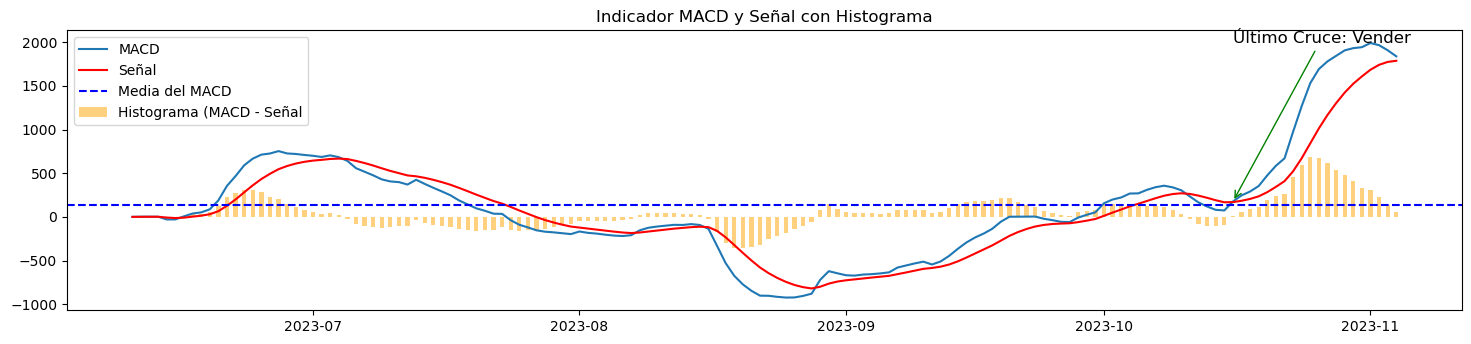

In [19]:
def visualizar_macd():
    # Descargar datos históricos de la acción a partir de la fecha y almacenarlos en un DataFrame llamado df
    df = yf.download('BTC-USD', start='2023-06-10', interval='1d')  # Datos diarios

    # Calcular el indicador MACD y las señales de compra y venta con medias ponderadas de 12 y 26 días
    df['EMA12'] = df.Close.ewm(span=12).mean()
    df['EMA26'] = df.Close.ewm(span=26).mean()
    df['MACD'] = df['EMA12'] - df['EMA26']
    df['Senal'] = df['MACD'].ewm(span=9).mean()

    # 'Buy' y 'Sell' para almacenar los índices de las señales de compra y venta, respectivamente.
    Buy, Sell = [], []

    for i in range(2, len(df)):
        if df['MACD'].iloc[i] > df['Senal'].iloc[i] and df['MACD'].iloc[i - 1] < df['Senal'].iloc[i - 1]:
            Buy.append(i)
        elif df['MACD'].iloc[i] < df['Senal'].iloc[i] and df['MACD'].iloc[i - 1] > df['Senal'].iloc[i - 1]:
            Sell.append(i)

    # Calcular la media del MACD
    media_macd = df['MACD'].mean()

    # Encuentra el último cruce de líneas y etiquétalo
    ultimo_cruce = None
    if Buy and Sell:
        ultimo_cruce = max(Buy[-1], Sell[-1])

    # Crear un gráfico combinado
    plt.figure(figsize=(18, 8))

    # Gráfico del indicador MACD y señal con histograma
    plt.subplot(2, 1, 1)
    plt.plot(df.index, df['MACD'], label='MACD')
    plt.plot(df.index, df['Senal'], label='Señal', color='red')
    plt.axhline(media_macd, color='blue', linestyle='--', label='Media del MACD')
    plt.bar(df.index, df['MACD'] - df['Senal'], width=0.5, color='orange', alpha=0.5, label='Histograma (MACD - Señal')

    # Agregar etiqueta para el último cruce
    if ultimo_cruce:
        plt.annotate(f'Último Cruce: {algoritmo_decision}', xy=(df.index[ultimo_cruce], df['MACD'].iloc[ultimo_cruce]),
                     xytext=(df.index[ultimo_cruce], df['MACD'].max()), arrowprops=dict(arrowstyle='->', color='green'), fontsize=12)

    plt.legend()
    plt.title('Indicador MACD y Señal con Histograma')
    plt.show()

visualizar_macd()


## Automatización


In [ ]:
from IPython.display import clear_output
import time
while (True):
  clear_output()
  importar_base_bitcoin()
  extraer_tendencias()
  limpieza_datos()
  tomar_decisiones()
  visualizacion()
  visualizar_macd()
  time.sleep(300)

### 9. Conclusión

- Demostración de un proyecto real que resalta cómo los datos pueden utilizarse para tomar decisiones informadas.
- Importancia de tratar los datos adecuadamente para evitar decisiones erróneas.

Agradecimientos especiales:

- **Alejandro Gamarra:** Instructor del Bootcamp.
- **Silvia Branco:** Especialista en Recursos Humanos.

Su valioso apoyo enriqueció tanto nuestros conocimientos técnicos como nuestras habilidades interpersonales, fundamentales en el campo de la Ciencia de Datos.